<a href="https://colab.research.google.com/github/MuhammadAaqib137/Deep_learning_work/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
 train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
# Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
#the model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [11]:
#configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
#configuring the custom loss
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
#Training your model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 16s 58ms/step - loss: 0.6087 - acc: 0.6893 - val_loss: 0.3947 - val_acc: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3312 - acc: 0.9017 - val_loss: 0.3061 - val_acc: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2328 - acc: 0.9317 - val_loss: 0.2814 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1748 - acc: 0.9464 - val_loss: 0.2780 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1373 - acc: 0.9596 - val_loss: 0.3022 - val_acc: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1127 - acc: 0.9671 - val_loss: 0.3216 - val_acc: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0952 - acc: 0.9721 - val_loss: 0.3123 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0773 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

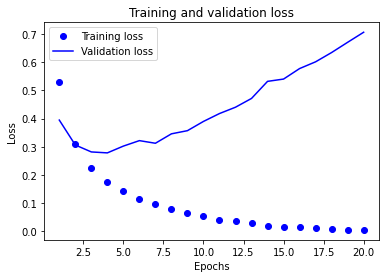

In [16]:
#plotting the validation and training loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

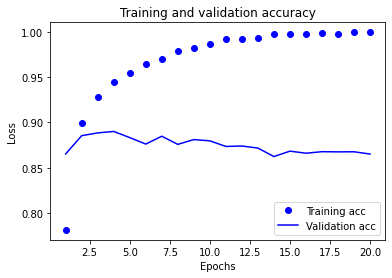

In [17]:
#plotting the validation and training accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, test_labels)

Epoch 1/9
30/30 [==============================] - 2s 52ms/step - loss: 0.0000e+00 - accuracy: 0.5002 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 2/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4912 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 3/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4914 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 4/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.5005 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 5/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 6/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4928 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 7/9
30/30 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4949 - val_loss

In [19]:
results

[0.0, 0.5]

In [20]:
model.predict(x_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)